In [1]:
# Importamos las librerias necesarias para nuestro proyecto
import pandas as p
import matplotlib.pyplot as plot
import seaborn as sb

In [2]:
# Importamos nuestros datos desde el csv
diabetes_original = p.read_csv("diabetes.csv")

# Quitamos la columna "Outcome" ya que no nos servirá para nuestro estudio estadístico
diabetes = diabetes_original.drop("Outcome", axis="columns")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
155,2,99,52,15,94,24.6,0.637,21
156,1,109,56,21,135,25.2,0.833,23
157,2,88,74,19,53,29.0,0.229,22
158,17,163,72,41,114,40.9,0.817,47


In [3]:
# Calculamos la Media, Mediana, Moda, Rango, Desviacion Tipica, Varianza de cada variable y la metemos en un diccionario que mas tarde representaremos en una tabla
datos_dict = dict()
for x in diabetes.columns:
    datos_dict.update({
        x: [diabetes[x].mean(), diabetes[x].median(),
                    diabetes[x].mode()[0],
                    diabetes[x].max() - diabetes[x].min(), diabetes[x].std(),
                    diabetes[x].var()]
    })

columnas = ["Media", "Mediana", "Moda", "Rango", "Desviacion Tipica", "Varianza"]
media_moda_etc = p.DataFrame.from_dict(datos_dict, orient="index", columns=columnas)
media_moda_etc

,Media,Mediana,Moda,Rango,Desviacion Tipica,Varianza
Pregnancies,4.181250,4.0000,1.000,17.000,3.499994,12.249961
Glucose,118.337500,113.0000,100.000,197.000,31.811925,1011.998585
BloodPressure,69.156250,72.0000,72.000,122.000,19.349661,374.409395
SkinThickness,20.062500,23.0000,0.000,60.000,16.183961,261.920597
Insulin,70.600000,0.0000,0.000,543.000,103.525235,10717.474214
BMI,31.537500,32.4500,0.000,55.000,9.147854,83.683239
DiabetesPedigreeFunction,0.463987,0.3475,0.254,2.203,0.344166,0.118451
Age,33.262500,30.0000,22.000,48.000,11.351163,128.848899


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

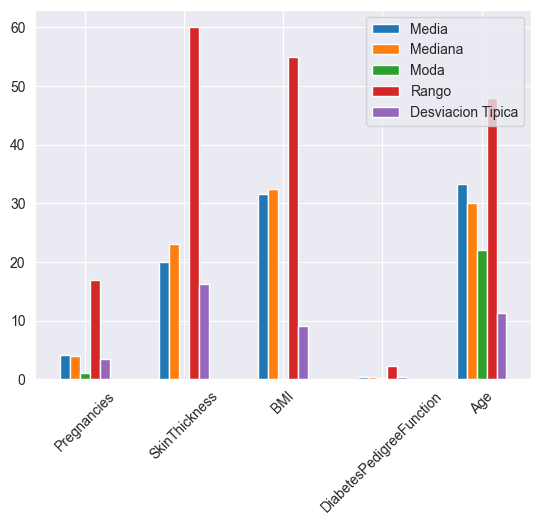

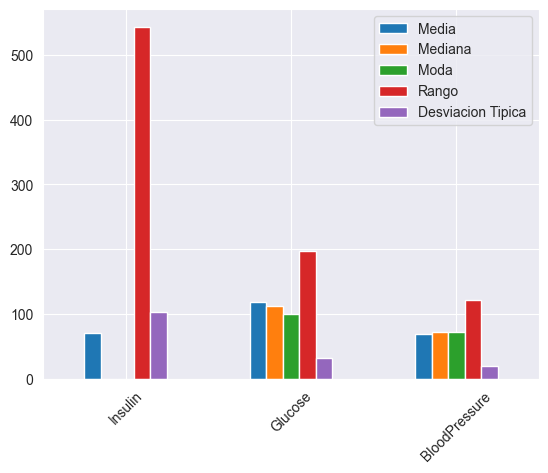

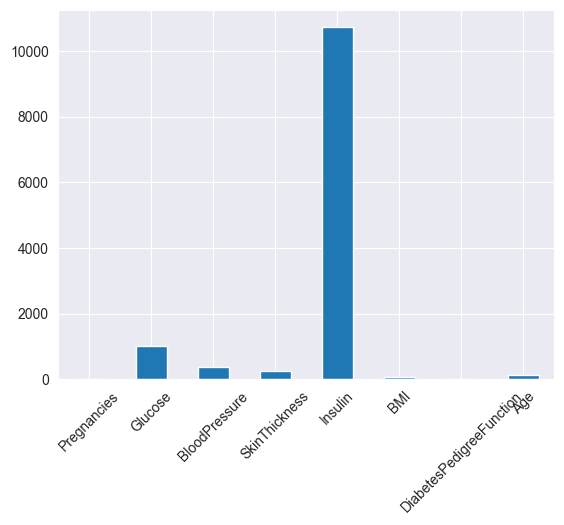

In [4]:
# Graficas de barras de la Media, Mediana, Moda, Rango, Desviacion Tipica de cada variable
varianza = media_moda_etc["Varianza"]
media_moda_etc2 = media_moda_etc.drop(["Varianza"], axis="columns")
media_moda_etc2.loc[media_moda_etc2.index.drop(["Insulin", "Glucose", "BloodPressure"])].plot.bar(rot=0)
plot.xticks(rotation=45)
media_moda_etc2.loc[["Insulin", "Glucose", "BloodPressure"]].plot.bar(rot=0)
plot.xticks(rotation=45)

# Varianza de cada variable
plot.figure()
varianza.plot.bar(rot=0)
# Etiquetas rotadas para mejor lectura
plot.xticks(rotation=45)

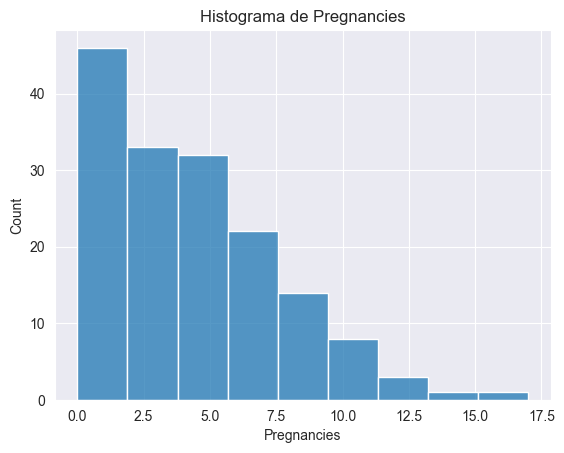

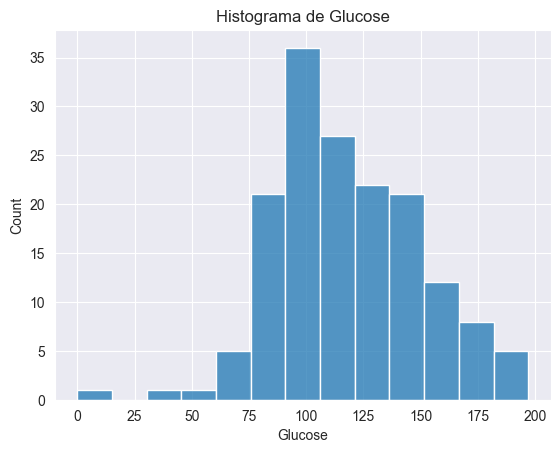

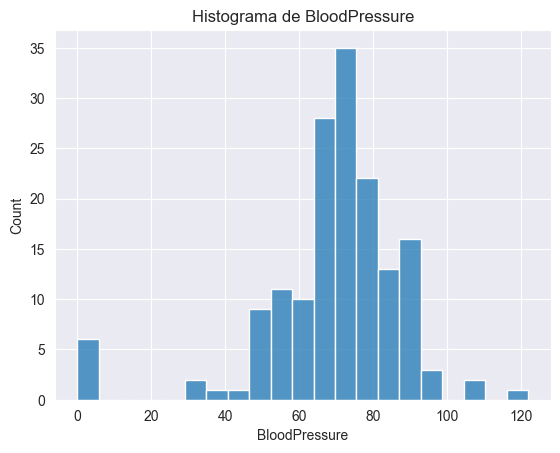

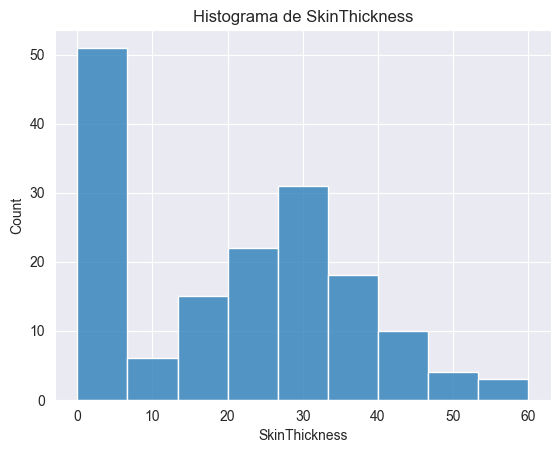

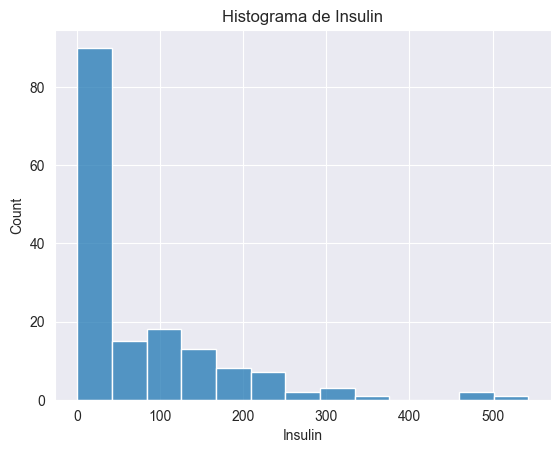

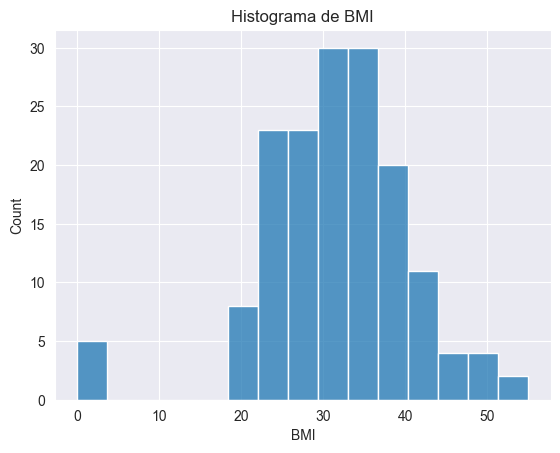

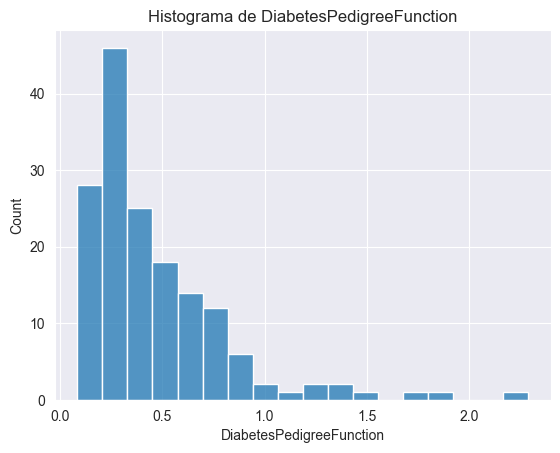

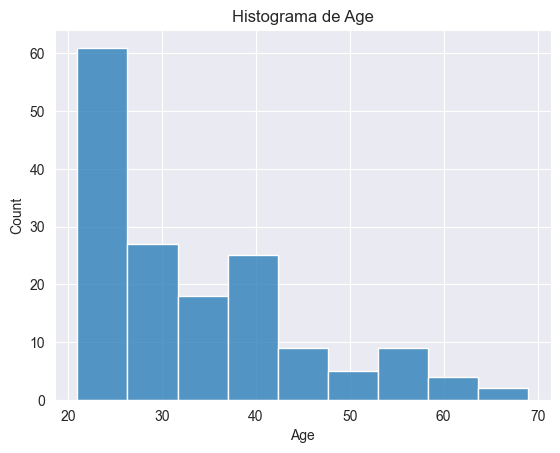

In [5]:
# Histogramas de cada variable
for x in diabetes.columns:
    plot.figure()
    sb.histplot(diabetes[x].T)
    plot.title("Histograma de " + x)

(array([0, 1, 2]),
 [Text(0, 0, 'Insulin'), Text(1, 0, 'Glucose'), Text(2, 0, 'BloodPressure')])

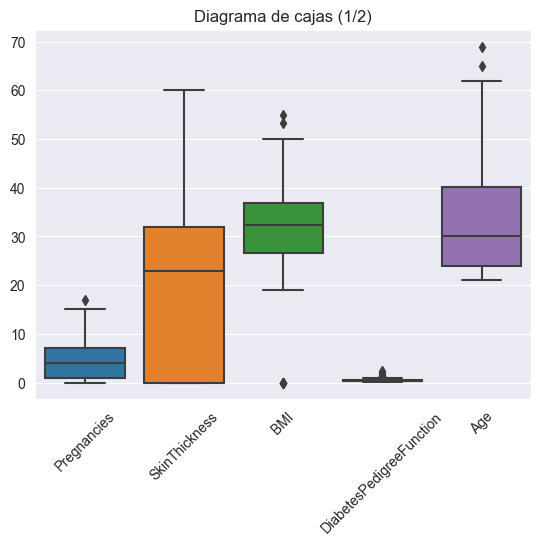

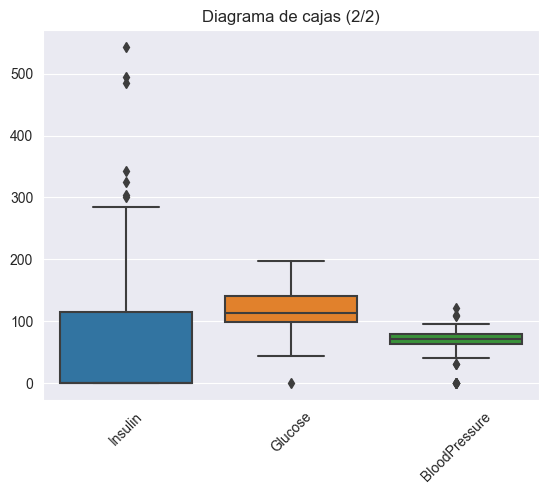

In [6]:
# Diagrama de cajas de cada variable
sb.boxplot(diabetes[diabetes.columns.drop(["Insulin", "Glucose", "BloodPressure"])])
plot.title("Diagrama de cajas (1/2)")
plot.xticks(rotation=45)

plot.figure()
sb.boxplot(diabetes[["Insulin", "Glucose", "BloodPressure"]])
plot.title("Diagrama de cajas (2/2)")
plot.xticks(rotation=45)

Text(0.5, 1.0, 'Matriz de coeficiente de correlación entre variables')

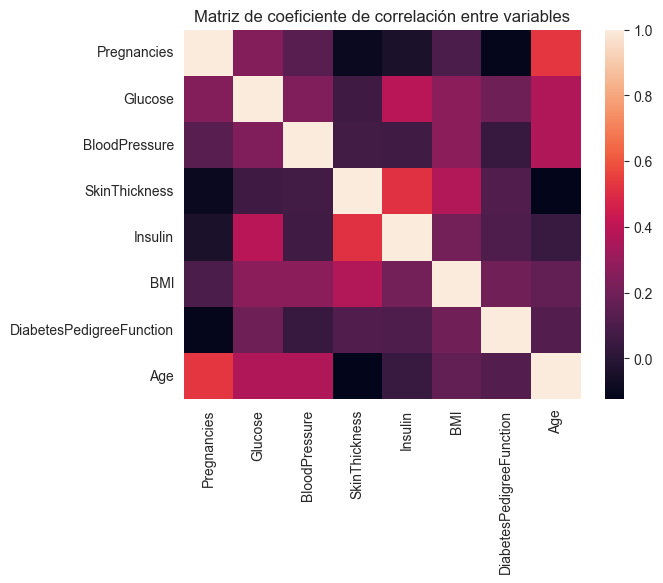

In [7]:
# Creamos una matriz de correlacion para poder ver cuales son las variables más relacionadas de forma clara por medio de su coeficiente de correlacion
sb.heatmap(diabetes.corr())
plot.title("Matriz de coeficiente de correlación entre variables")

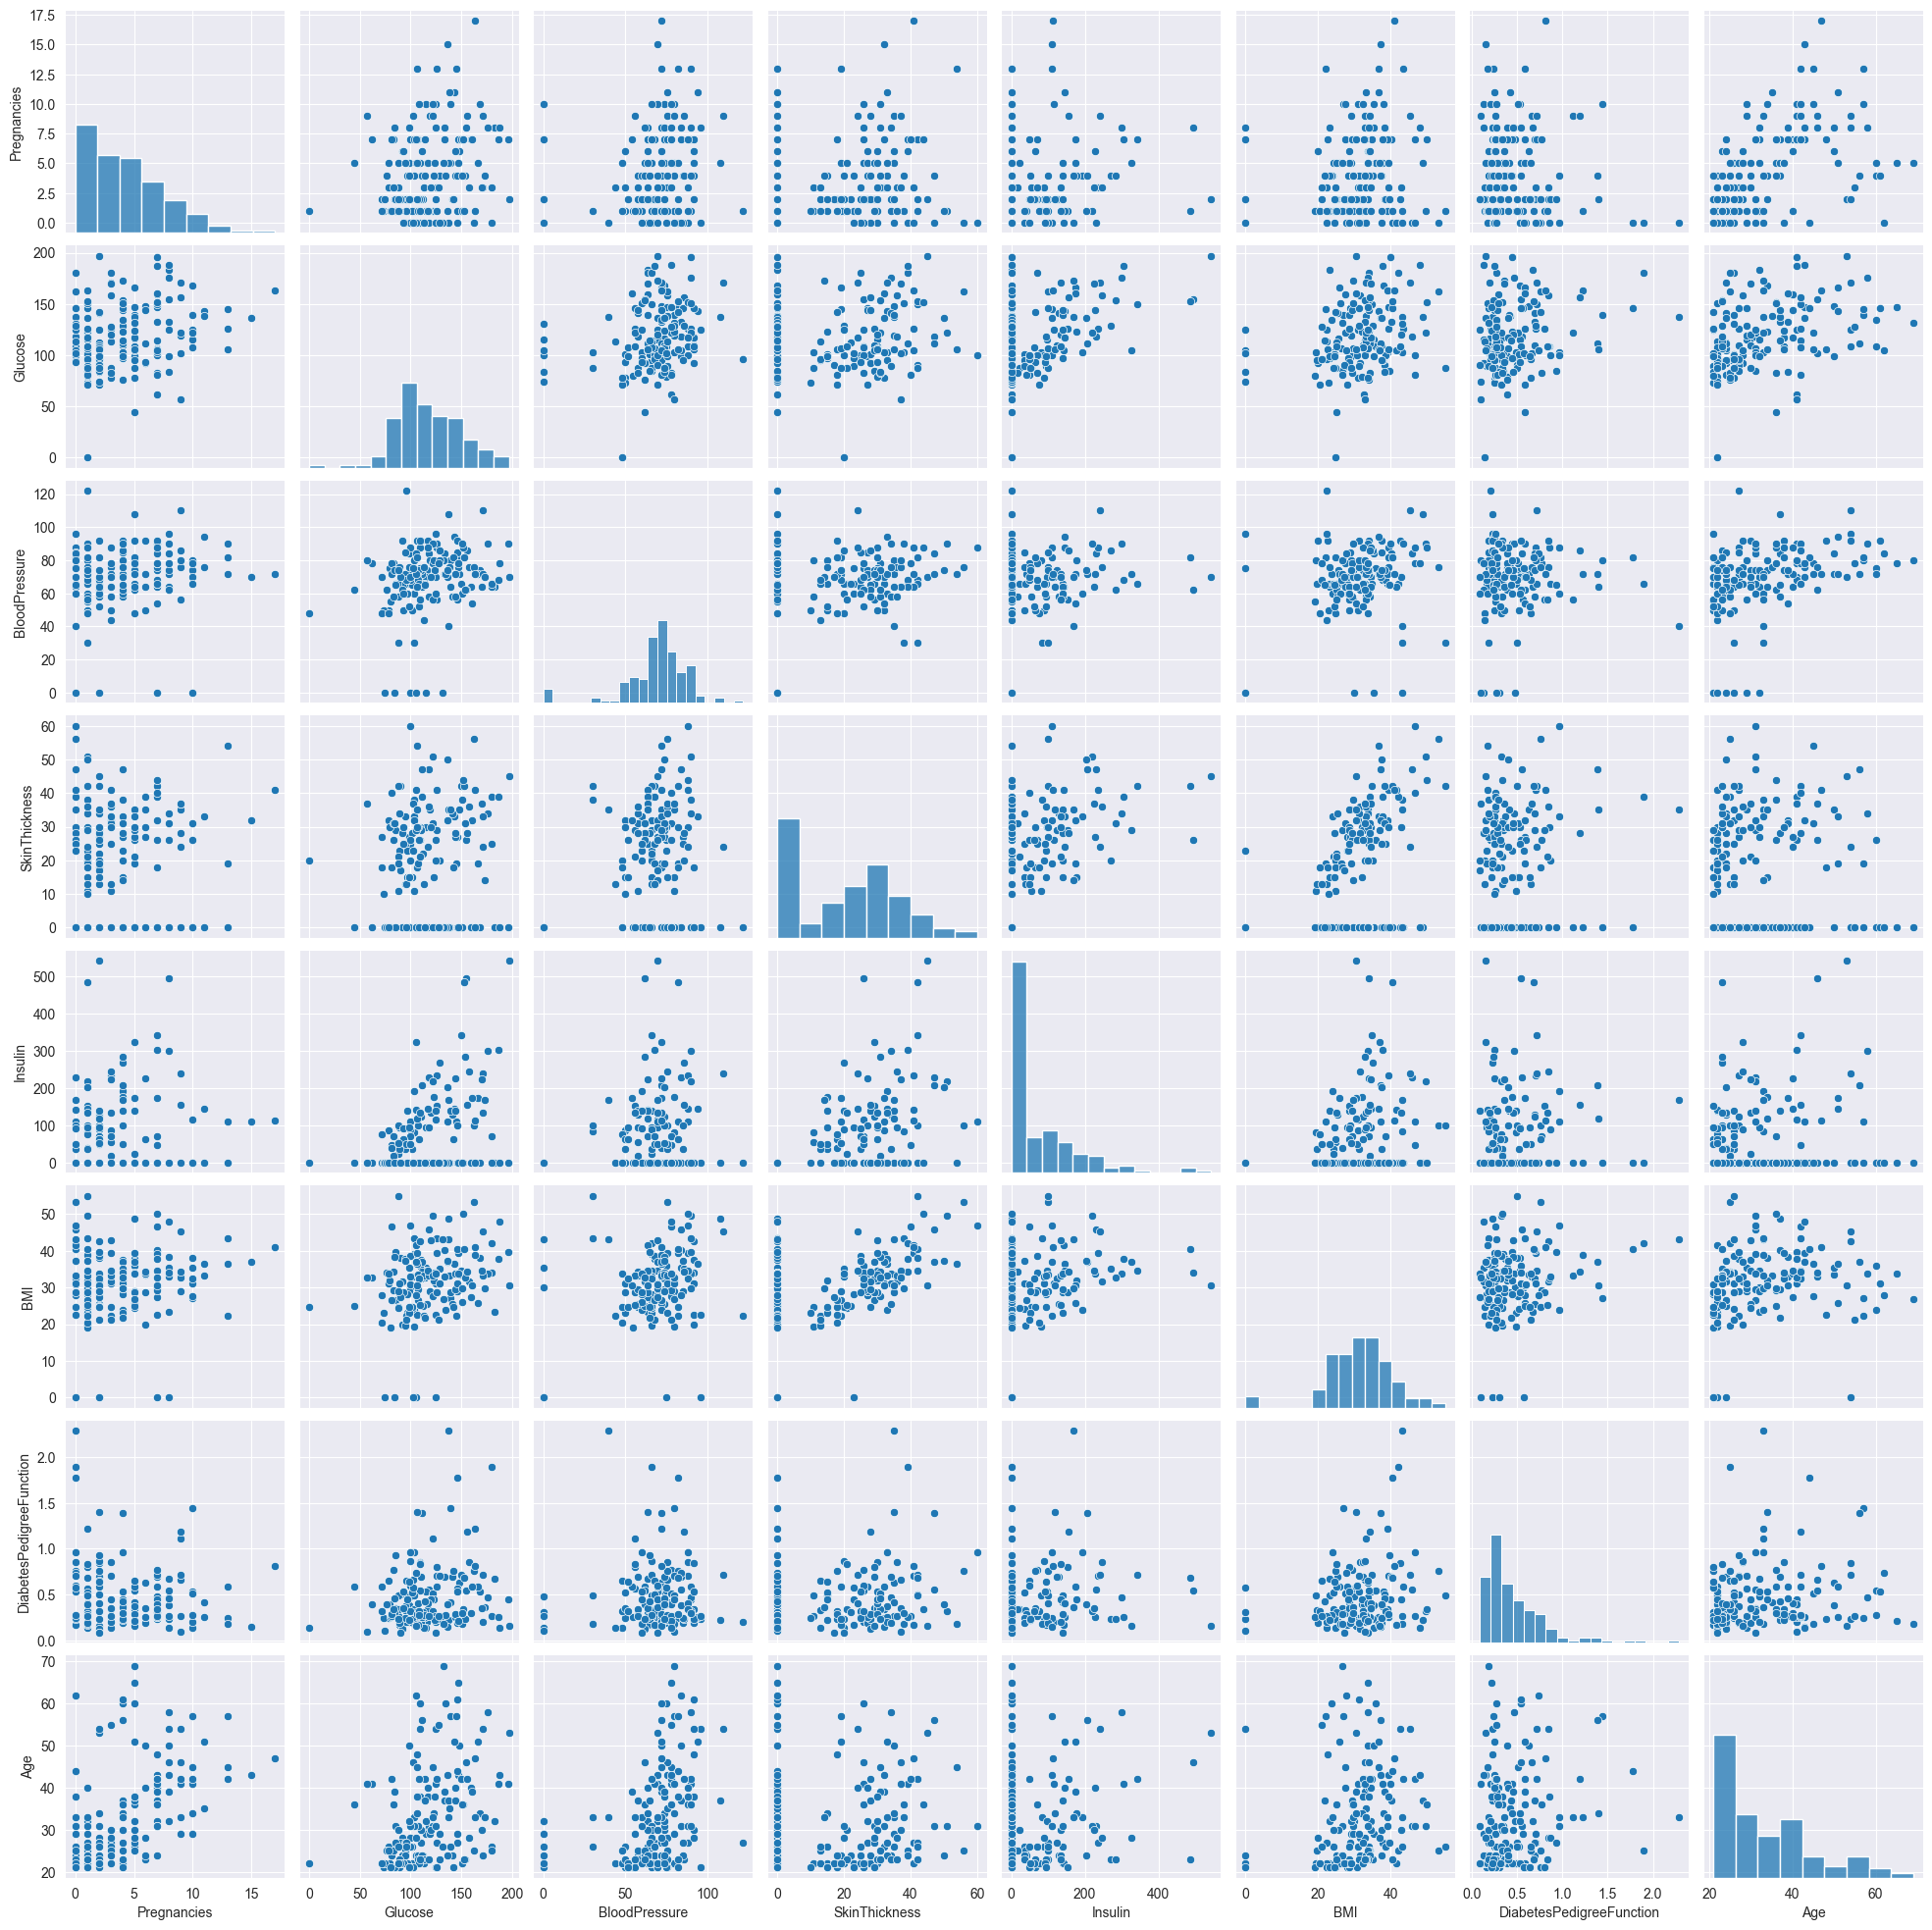

In [8]:
# Diagrama de correlacion por pares, para entender la anterior matriz de correlacion
sb.pairplot(diabetes)



In [9]:
# TODO:
# ✓Un análisis de regresión para las dos variables continuas, así como su gráfico de dispersión y el
# coeficiente de correlación.
# ✓Gráficos y tablas que pueden explicar las variables de una manera más completa (diagramas de
# caja según variable categórica, por ejemplo).